In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries loaded ✓")

Libraries loaded ✓


In [6]:
# Load your parquet file
data_path = "ddos.parquet"

print("Loading dataset...")
df = pd.read_parquet(data_path)

print(f"✓ Loaded {len(df):,} records")
print(f"✓ Total columns: {len(df.columns)}")
print(df.columns)

Loading dataset...
✓ Loaded 540,494 records
✓ Total columns: 319
Index(['src_port', 'dst_port', 'duration', 'packets_count',
       'fwd_packets_count', 'bwd_packets_count', 'total_payload_bytes',
       'fwd_total_payload_bytes', 'bwd_total_payload_bytes',
       'payload_bytes_max',
       ...
       'max_fwd_payload_bytes_delta_len', 'mean_fwd_payload_bytes_delta_len',
       'mode_fwd_payload_bytes_delta_len',
       'variance_fwd_payload_bytes_delta_len',
       'std_fwd_payload_bytes_delta_len', 'median_fwd_payload_bytes_delta_len',
       'skewness_fwd_payload_bytes_delta_len',
       'cov_fwd_payload_bytes_delta_len', 'label', 'activity'],
      dtype='object', length=319)


In [7]:


# Check both label columns
print("\n=== LABEL (High-level) ===")
print(df['label'].value_counts())

print("\n=== ACTIVITY (Detailed) ===")
print(df['activity'].value_counts())

# Separate features from labels
label_cols = ['label', 'activity']
feature_cols = [col for col in df.columns if col not in label_cols]

X = df[feature_cols]
y_label = df['label']      # For Stage 1
y_activity = df['activity']  # For Stage 2

print(f"\nFeatures: {len(feature_cols)}")
print(f"Feature shape: {X.shape}")


=== LABEL (High-level) ===
label
Benign        349178
Attack        170436
Suspicious     20880
Name: count, dtype: int64

=== ACTIVITY (Detailed) ===
activity
Benign                        301014
Attack-TCP-BYPass-V1          134110
Benign-Web_Browsing_HTTP-S     29376
Suspicious                     20880
Benign-Systemic                 9342
Benign-Telnet                   4766
Attack-TCP-Flag-SYN             3147
Attack-TCP-Flag-ACK             3135
Attack-TCP-Flag-ACK-PSH         3109
Attack-Killer-TCP               3046
Attack-TCP-Valid-SYN            3003
Attack-TCP-Flag-SYN-ACK         2990
Attack-TCP-IGMP                 2960
Attack-TCP-Flag-MIX             2919
Attack-Killall-v2               2824
Attack-TCP-SYN                  2739
Attack-TCP-Control              2491
Benign-SSH                      1968
Benign-Email-Send               1281
Benign-Email-Receive            1084
Attack-TCP-Flag-SYN-TIME         980
Attack-TCP-Flag-SYN-TFO          843
Attack-TCP-Flag-OSYNP    

In [4]:
# Check data types
print("Data types distribution:")
print(X.dtypes.value_counts())

# Numeric vs non-numeric
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"\n✓ Numeric features: {len(numeric_features)}")
print(f"✓ Non-numeric features: {len(non_numeric_features)}")

if len(non_numeric_features) > 0:
    print(f"\nNon-numeric features found:")
    print(non_numeric_features[:10])

Data types distribution:
float32    261
int8        25
int32       20
int16        9
int64        2
object       1
Name: count, dtype: int64

✓ Numeric features: 317
✓ Non-numeric features: 1

Non-numeric features found:
['activity']


Calculating feature importance for BOTH label types...

=== Feature Importance for LABEL Classification ===


C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



Top 20 features for Label classification:
                              Feature  Correlation
38                   min_header_bytes     0.748597
39                  mean_header_bytes     0.737956
44                  mode_header_bytes     0.735449
41                median_header_bytes     0.731927
37                   max_header_bytes     0.714455
48               fwd_min_header_bytes     0.544634
54              fwd_mode_header_bytes     0.544219
51            fwd_median_header_bytes     0.544112
49              fwd_mean_header_bytes     0.544016
47               fwd_max_header_bytes     0.542586
69                 fwd_init_win_bytes     0.542291
117                   rst_flag_counts     0.370991
145  fwd_syn_flag_percentage_in_total     0.332576
174                    packet_IAT_min     0.330695
179                  packets_IAT_mode     0.330695
176                packets_IAT_median     0.330695
171                  packets_IAT_mean     0.330695
173                    packet_IAT_max  

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



Top 20 features for Activity classification:
                              Feature  Correlation
38                   min_header_bytes     0.837010
39                  mean_header_bytes     0.826542
44                  mode_header_bytes     0.822875
41                median_header_bytes     0.820311
37                   max_header_bytes     0.801501
48               fwd_min_header_bytes     0.635358
54              fwd_mode_header_bytes     0.634893
51            fwd_median_header_bytes     0.634671
49              fwd_mean_header_bytes     0.634478
47               fwd_max_header_bytes     0.632436
69                 fwd_init_win_bytes     0.625627
145  fwd_syn_flag_percentage_in_total     0.458903
137      syn_flag_percentage_in_total     0.442375
117                   rst_flag_counts     0.417207
138      ack_flag_percentage_in_total     0.413953
140      rst_flag_percentage_in_total     0.372354
174                    packet_IAT_min     0.342341
179                  packets_IAT_mod

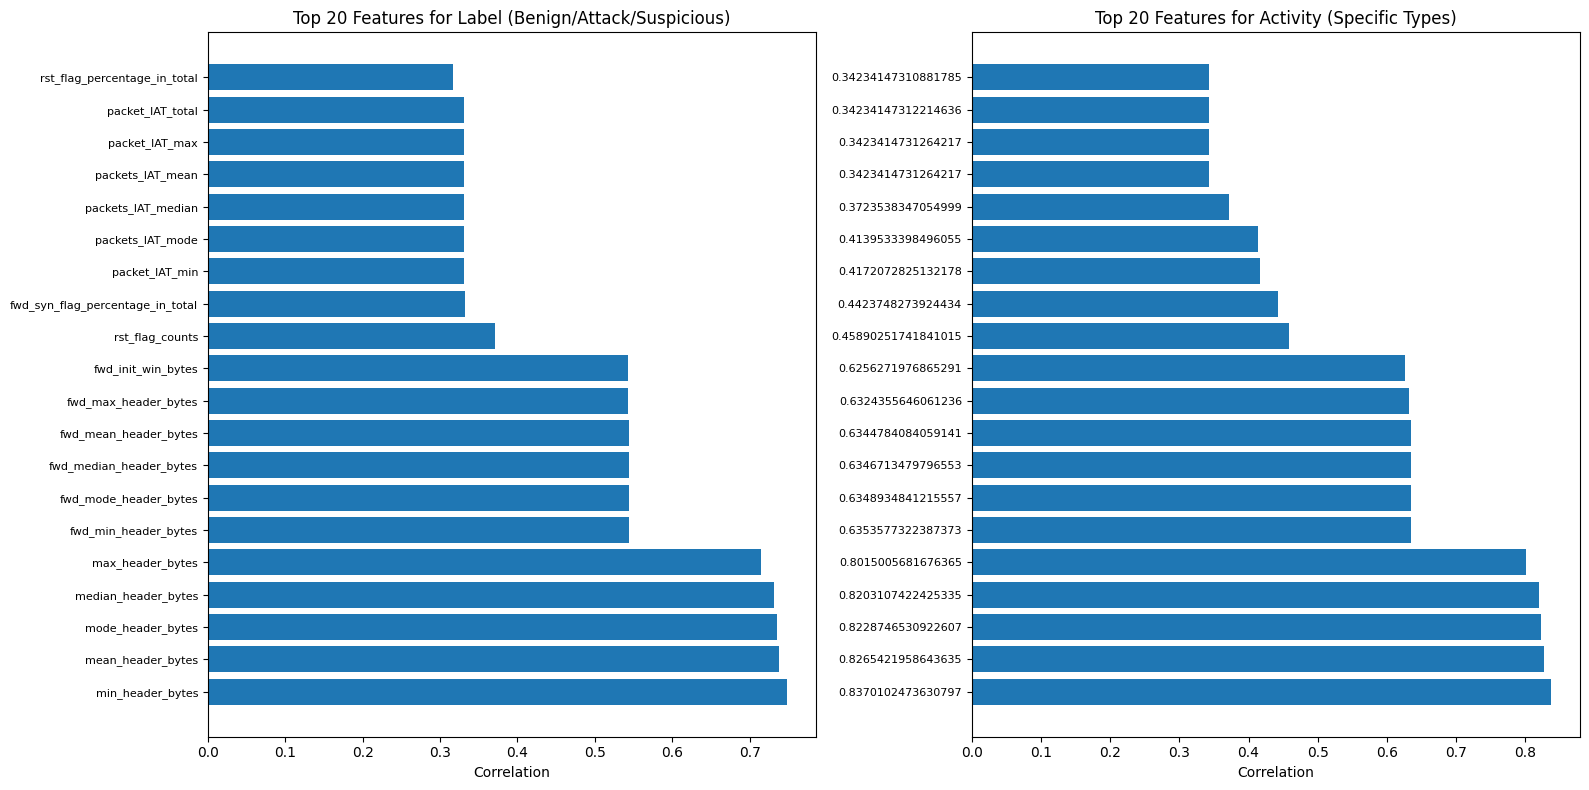

In [10]:
print("Calculating feature importance for BOTH label types...")

# Encode both label types
le_label = LabelEncoder()
le_activity = LabelEncoder()

y_label_encoded = le_label.fit_transform(y_label)
y_activity_encoded = le_activity.fit_transform(y_activity)

# Select numeric features only
X_numeric = X.select_dtypes(include=[np.number])

# Calculate correlations with LABEL (Stage 1: Benign/Attack/Suspicious)
print("\n=== Feature Importance for LABEL Classification ===")
label_correlations = []
for col in X_numeric.columns:
    corr = np.corrcoef(X_numeric[col], y_label_encoded)[0, 1]
    if not np.isnan(corr):
        label_correlations.append((col, abs(corr)))

label_corr_df = pd.DataFrame(label_correlations, columns=['Feature', 'Correlation'])
label_corr_df = label_corr_df.sort_values('Correlation', ascending=False)

print("\nTop 20 features for Label classification:")
print(label_corr_df.head(20))

# Calculate correlations with ACTIVITY (Stage 2: Specific activities)
print("\n=== Feature Importance for ACTIVITY Classification ===")
activity_correlations = []
for col in X_numeric.columns:
    corr = np.corrcoef(X_numeric[col], y_activity_encoded)[0, 1]
    if not np.isnan(corr):
        activity_correlations.append((col, abs(corr)))

activity_corr_df = pd.DataFrame(activity_correlations, columns=['Feature', 'Correlation'])
activity_corr_df = activity_corr_df.sort_values('Correlation', ascending=False)

print("\nTop 20 features for Activity classification:")
print(activity_corr_df.head(20))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Label features
top_20_label = label_corr_df.head(20)
axes[0].barh(range(len(top_20_label)), top_20_label['Correlation'].values)
axes[0].set_yticks(range(len(top_20_label)))
axes[0].set_yticklabels(top_20_label['Feature'].values, fontsize=8)
axes[0].set_xlabel('Correlation')
axes[0].set_title('Top 20 Features for Label (Benign/Attack/Suspicious)')

# Activity features
top_20_activity = activity_corr_df.head(20)
axes[1].barh(range(len(top_20_activity)), top_20_activity['Correlation'].values)
axes[1].set_yticks(range(len(top_20_activity)))
axes[1].set_yticklabels(top_20_activity['Correlation'].values, fontsize=8)
axes[1].set_xlabel('Correlation')
axes[1].set_title('Top 20 Features for Activity (Specific Types)')

plt.tight_layout()
plt.show()

In [11]:
# Strategy: Use union of top features from both tasks
# This ensures we have good features for BOTH stages

n_features_each = 30  # Top 30 from each

# Get top features for each task
top_label_features = set(label_corr_df.head(n_features_each)['Feature'].tolist())
top_activity_features = set(activity_corr_df.head(n_features_each)['Feature'].tolist())

# Union: features good for either task
selected_features = list(top_label_features | top_activity_features)

# Intersection: features good for BOTH tasks
common_features = list(top_label_features & top_activity_features)

print(f"\n=== FEATURE SELECTION RESULTS ===")
print(f"Top features for Label only: {len(top_label_features - top_activity_features)}")
print(f"Top features for Activity only: {len(top_activity_features - top_label_features)}")
print(f"Features good for BOTH: {len(common_features)}")
print(f"Total selected (union): {len(selected_features)}")

print(f"\nFeatures good for BOTH tasks (most valuable):")
for i, feat in enumerate(common_features[:20], 1):
    print(f"{i:2d}. {feat}")

# Create final feature set
X_selected = X[selected_features]

print(f"\nFinal feature set:")
print(f"  Original: {len(X.columns)} features")
print(f"  Selected: {len(selected_features)} features")
print(f"  Reduction: {(1 - len(selected_features)/len(X.columns))*100:.1f}%")


=== FEATURE SELECTION RESULTS ===
Top features for Label only: 2
Top features for Activity only: 2
Features good for BOTH: 28
Total selected (union): 32

Features good for BOTH tasks (most valuable):
 1. packet_IAT_max
 2. packets_IAT_mean
 3. fwd_max_header_bytes
 4. bwd_mean_header_bytes
 5. bwd_min_header_bytes
 6. bwd_max_header_bytes
 7. packet_IAT_total
 8. bwd_rst_flag_percentage_in_bwd_packets
 9. fwd_syn_flag_percentage_in_total
10. median_header_bytes
11. rst_flag_percentage_in_total
12. mode_header_bytes
13. syn_flag_percentage_in_total
14. packets_IAT_mode
15. fwd_mode_header_bytes
16. bwd_median_header_bytes
17. fwd_min_header_bytes
18. rst_flag_counts
19. mean_header_bytes
20. packet_IAT_min

Final feature set:
  Original: 317 features
  Selected: 32 features
  Reduction: 89.9%


In [15]:
import json
# Save feature selection info
feature_info = {
    'n_features_total': len(selected_features),
    'n_features_label_only': len(top_label_features - top_activity_features),
    'n_features_activity_only': len(top_activity_features - top_label_features),
    'n_features_common': len(common_features),
    'selected_features': selected_features,
    'common_features': common_features,
    'label_specific': list(top_label_features - top_activity_features),
    'activity_specific': list(top_activity_features - top_label_features),
    'original_features': len(X.columns),
    'reduction_pct': round((1 - len(selected_features)/len(X.columns))*100, 1)
}

# Save to JSON
with open('data/selected_features.json', 'w') as f:
    json.dump(feature_info, f, indent=2)

print("✓ Feature info saved to: selected_features.json")

# Save processed data with BOTH labels
processed_data = pd.concat([X_selected, y_label, y_activity], axis=1)
processed_data.to_parquet('ddos.parquet', index=False)

print("✓ Processed data saved to: processed_data.parquet")
print(f"  Shape: {processed_data.shape}")
print(f"  Columns: {len(X_selected.columns)} features + 2 labels")

✓ Feature info saved to: selected_features.json
✓ Processed data saved to: processed_data.parquet
  Shape: (540494, 34)
  Columns: 32 features + 2 labels


In [16]:
print("="*60)
print("DAY 2 COMPLETE - FEATURE EXTRACTION SUMMARY")
print("="*60)

print(f"\nOriginal dataset:")
print(f"  Records: {len(df):,}")
print(f"  Features: {len(X.columns)}")

print(f"\nProcessed dataset:")
print(f"  Records: {len(processed_data):,}")
print(f"  Selected features: {len(selected_features)}")
print(f"  Reduction: {feature_info['reduction_pct']}%")

print(f"\nFeature breakdown:")
print(f"  Good for Label task: {len(top_label_features)}")
print(f"  Good for Activity task: {len(top_activity_features)}")
print(f"  Good for BOTH: {len(common_features)}")

print(f"\nLabel distribution (Stage 1):")
print(y_label.value_counts())

print(f"\nActivity distribution (Stage 2) - Top 10:")
print(y_activity.value_counts().head(10))

print(f"\n✓ Next: Day 3 will build TWO models:")
print(f"  Model 1: Label classifier (Benign/Attack/Suspicious)")
print(f"  Model 2: Activity classifier (Specific types)")

print("\n🎉 Ready for Day 3: Two-Stage Model Training!")
print("="*60)

DAY 2 COMPLETE - FEATURE EXTRACTION SUMMARY

Original dataset:
  Records: 540,494
  Features: 317

Processed dataset:
  Records: 540,494
  Selected features: 32
  Reduction: 89.9%

Feature breakdown:
  Good for Label task: 30
  Good for Activity task: 30
  Good for BOTH: 28

Label distribution (Stage 1):
label
Benign        349178
Attack        170436
Suspicious     20880
Name: count, dtype: int64

Activity distribution (Stage 2) - Top 10:
activity
Benign                        301014
Attack-TCP-BYPass-V1          134110
Benign-Web_Browsing_HTTP-S     29376
Suspicious                     20880
Benign-Systemic                 9342
Benign-Telnet                   4766
Attack-TCP-Flag-SYN             3147
Attack-TCP-Flag-ACK             3135
Attack-TCP-Flag-ACK-PSH         3109
Attack-Killer-TCP               3046
Name: count, dtype: int64

✓ Next: Day 3 will build TWO models:
  Model 1: Label classifier (Benign/Attack/Suspicious)
  Model 2: Activity classifier (Specific types)

🎉 Ready f